In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path ='E:/Trimester 2/Data science/finlatics/MLResearch/Facebook Dataset/Facebook_Marketplace_data.csv'
dataset = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
dataset_info = dataset.info()
dataset_head = dataset.head()

dataset_info, dataset_head

# Remove redundant columns
cleaned_dataset = dataset.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'])

# Convert `status_published` to datetime format
cleaned_dataset['status_published'] = pd.to_datetime(cleaned_dataset['status_published'], errors='coerce')

# Check for missing or invalid values after conversion
missing_status_published = cleaned_dataset['status_published'].isnull().sum()

# Display the updated dataset information
cleaned_dataset_info = cleaned_dataset.info()

missing_status_published, cleaned_dataset_info




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

(0, None)

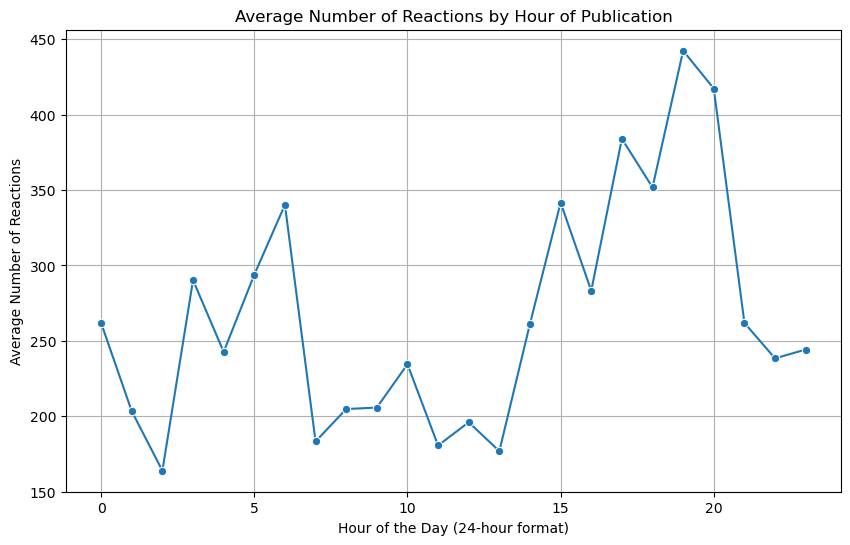

In [8]:
# Convert `status_published` to datetime
dataset['status_published'] = pd.to_datetime(dataset['status_published'], errors='coerce')

# Extract hour from `status_published`
dataset['hour_published'] = dataset['status_published'].dt.hour

# Group by hour and calculate average reactions
hourly_reactions = dataset.groupby('hour_published')['num_reactions'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_reactions, marker='o')
plt.title('Average Number of Reactions by Hour of Publication')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Average Number of Reactions')
plt.grid()
plt.show()


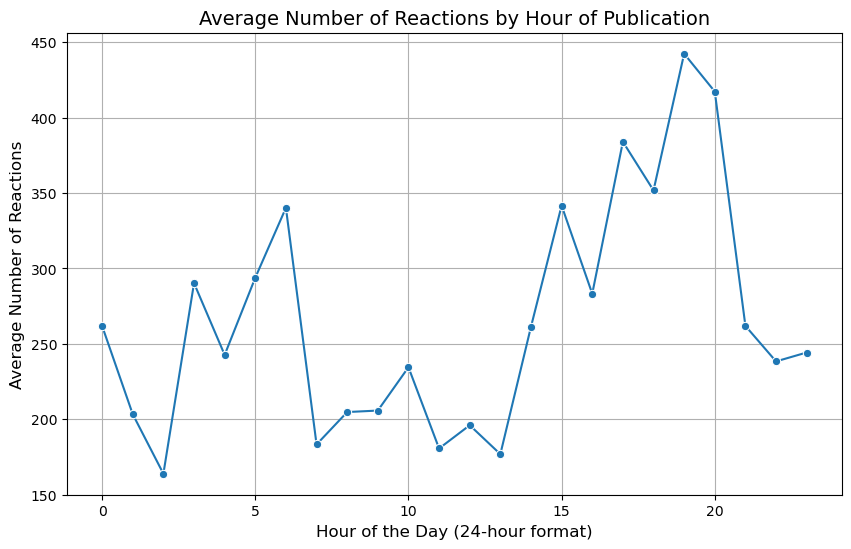

hour_published
0     261.839474
1     203.315725
2     163.907618
3     290.270208
4     242.685864
5     293.870968
6     340.213198
7     183.301549
8     204.796897
9     205.780761
10    234.508333
11    180.639456
12    196.053763
13    176.875000
14    261.333333
15    341.666667
16    283.250000
17    384.000000
18    351.750000
19    442.368421
20    417.288136
21    261.907895
22    238.376126
23    244.276850
Name: num_reactions, dtype: float64

In [9]:
# Extract hour from `status_published`
cleaned_dataset['hour_published'] = cleaned_dataset['status_published'].dt.hour

# Group by hour and calculate average reactions
hourly_reactions = cleaned_dataset.groupby('hour_published')['num_reactions'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_reactions, marker='o')
plt.title('Average Number of Reactions by Hour of Publication', fontsize=14)
plt.xlabel('Hour of the Day (24-hour format)', fontsize=12)
plt.ylabel('Average Number of Reactions', fontsize=12)
plt.grid()
plt.show()

hourly_reactions

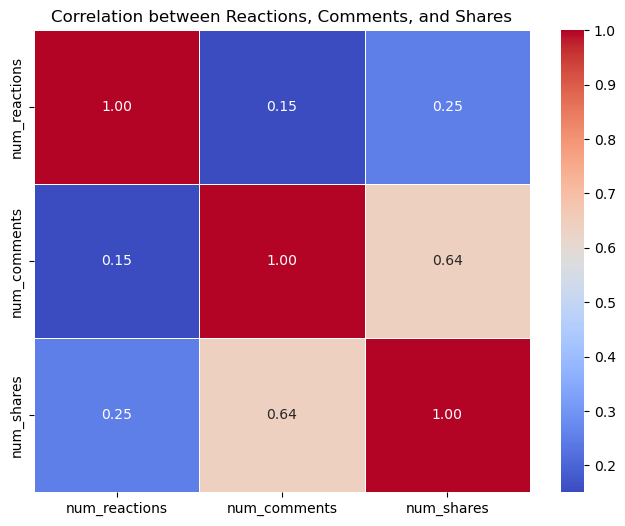

In [10]:
# Calculate correlation
correlation_matrix = dataset[['num_reactions', 'num_comments', 'num_shares']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Reactions, Comments, and Shares')
plt.show()


C:\Users\ramak\AppData\Local\Temp\ipykernel_26608\753990043.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=post_type_counts.index, y=post_type_counts.values, palette='viridis')


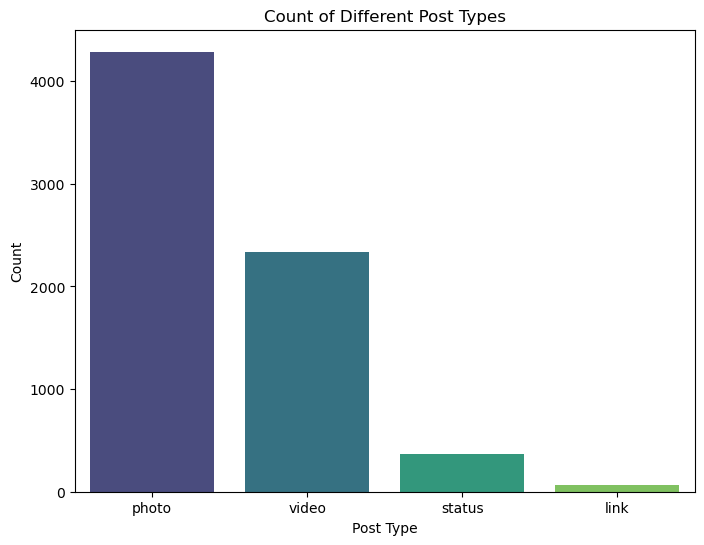

In [12]:
# Count the different types of posts
post_type_counts = dataset['status_type'].value_counts()

# Plot the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=post_type_counts.index, y=post_type_counts.values, palette='viridis')
plt.title('Count of Different Post Types')
plt.xlabel('Post Type')
plt.ylabel('Count')
plt.show()


             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


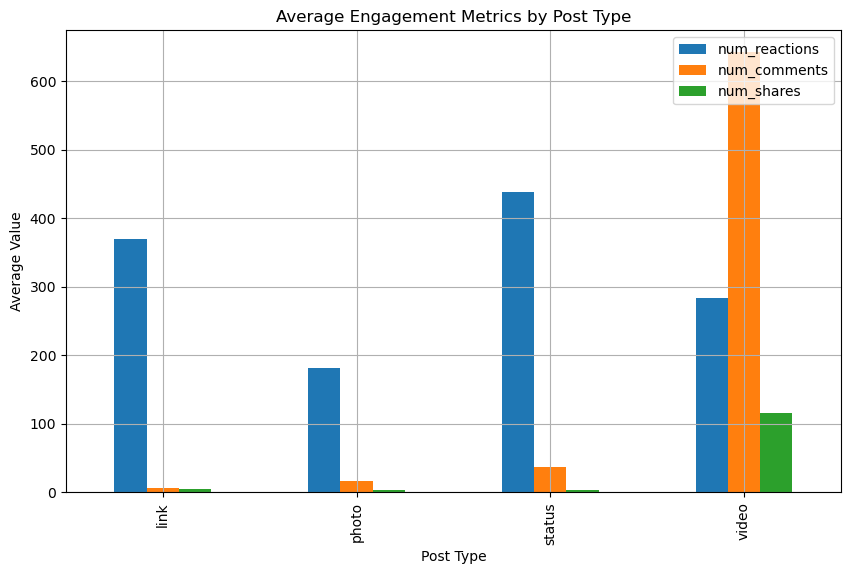

In [13]:
# Group by `status_type` and calculate averages
averages_by_post_type = dataset.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

# Display the averages
print(averages_by_post_type)

# Plot the averages
averages_by_post_type.plot(kind='bar', figsize=(10, 6))
plt.title('Average Engagement Metrics by Post Type')
plt.xlabel('Post Type')
plt.ylabel('Average Value')
plt.legend(loc='upper right')
plt.grid()
plt.show()


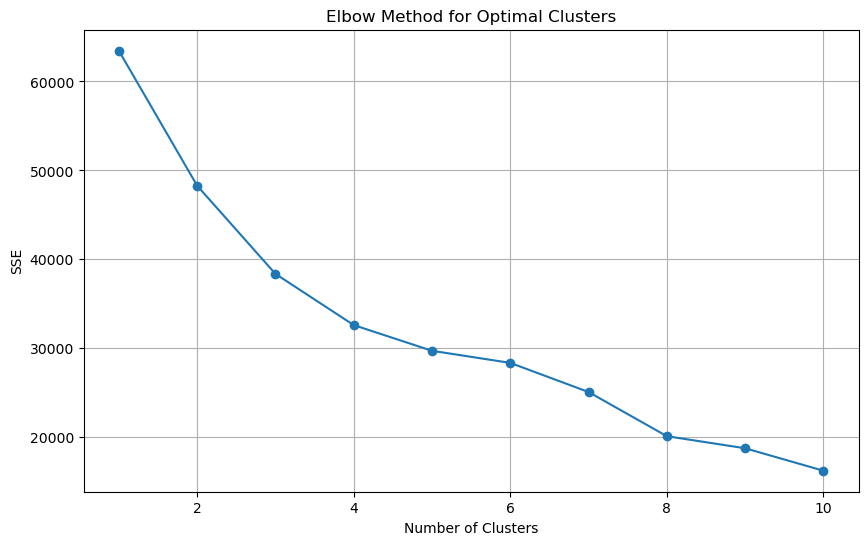

cluster
0    6405
2     372
1     273
Name: count, dtype: int64


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns
columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
           'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
data = dataset[columns]

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Use Elbow Method to determine the number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.grid()
plt.show()

# Train K-Means with the optimal number of clusters (e.g., 3 based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['cluster'] = kmeans.fit_predict(data_scaled)

# Display cluster counts
print(dataset['cluster'].value_counts())


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Select columns for clustering
columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Extract relevant data
clustering_data = cleaned_dataset[columns]

# Define a preprocessor for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('status_type', OneHotEncoder(), ['status_type']),
        ('numeric', StandardScaler(), ['num_reactions', 'num_comments', 'num_shares',
                                       'num_likes', 'num_loves', 'num_wows',
                                       'num_hahas', 'num_sads', 'num_angrys'])
    ]
)

# Create a pipeline for preprocessing and clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=3, random_state=42))  # Default: 3 clusters
])

# Fit the pipeline to the data
pipeline.fit(clustering_data)

# Assign cluster labels to the dataset
cleaned_dataset['cluster'] = pipeline.named_steps['kmeans'].labels_

# Count the instances in each cluster
cluster_counts = cleaned_dataset['cluster'].value_counts()

# Save the dataset with cluster labels
output_path = 'downloads/Facebook_Marketplace_with_clusters.csv'
cleaned_dataset.to_csv(output_path, index=False)

cluster_counts, output_path


(cluster
 0    6370
 2     382
 1     298
 Name: count, dtype: int64,
 'downloads/Facebook_Marketplace_with_clusters.csv')

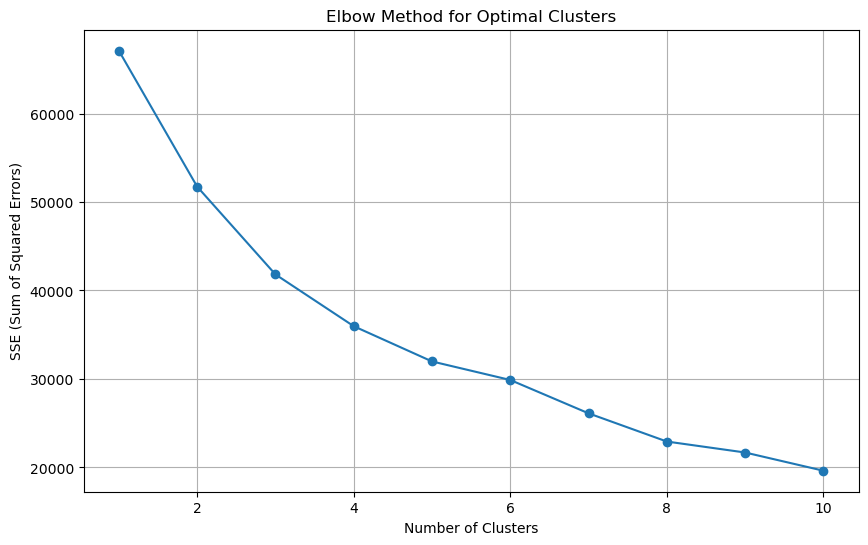

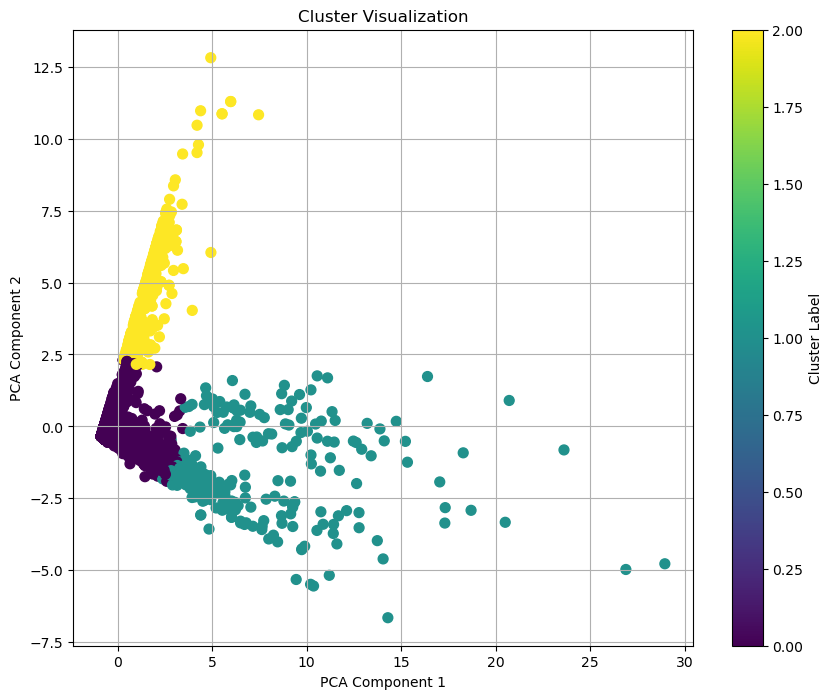

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

# Define columns for clustering
columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Extract relevant data
data = dataset[columns]

# Preprocessor for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('status_type', OneHotEncoder(), ['status_type']),
        ('numeric', StandardScaler(), ['num_reactions', 'num_comments', 'num_shares',
                                       'num_likes', 'num_loves', 'num_wows',
                                       'num_hahas', 'num_sads', 'num_angrys'])
    ]
)

# Preprocess data
data_preprocessed = preprocessor.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_preprocessed)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.grid()
plt.show()

# Based on the graph, select the number of clusters (e.g., 3)
optimal_clusters = 3  # Adjust this based on the graph

# Train K-Means with the selected number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_preprocessed)

# Add cluster labels to the dataset
dataset['cluster'] = cluster_labels

# Visualize the clusters (using PCA for dimensionality reduction if needed)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_preprocessed)

plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


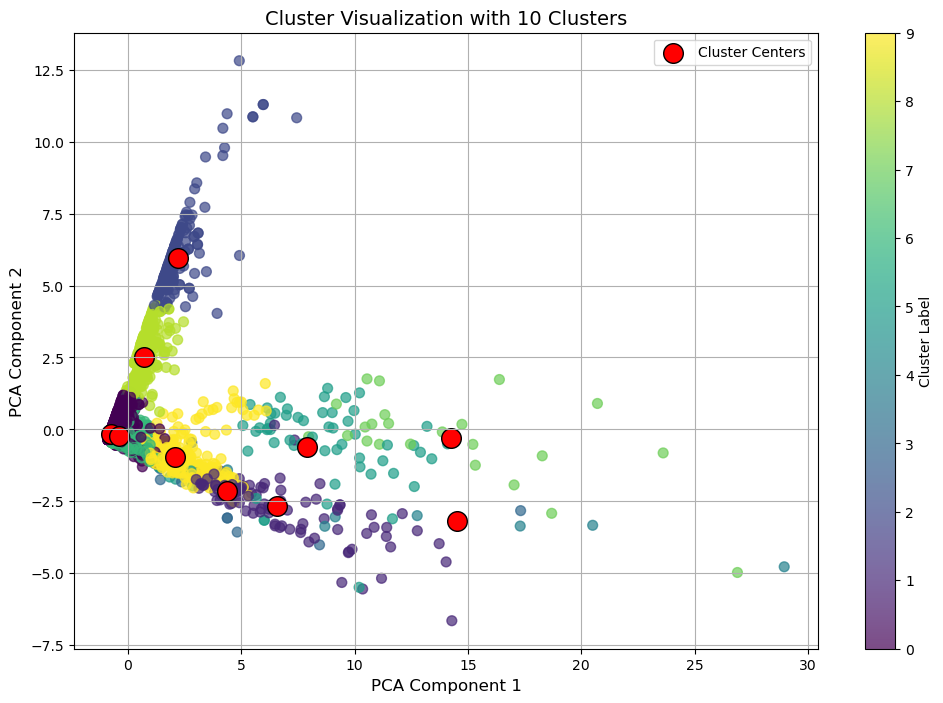

In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


# Define columns for clustering
columns = ['status_type', 'num_reactions', 'num_comments', 'num_shares',
           'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']

# Extract relevant data
data = dataset[columns]

# Preprocessor for scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('status_type', OneHotEncoder(), ['status_type']),
        ('numeric', StandardScaler(), ['num_reactions', 'num_comments', 'num_shares',
                                       'num_likes', 'num_loves', 'num_wows',
                                       'num_hahas', 'num_sads', 'num_angrys'])
    ]
)

# Preprocess data
data_preprocessed = preprocessor.fit_transform(data)

# Train K-Means with 10 clusters
optimal_clusters = 10
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(data_preprocessed)

# Add cluster labels to the dataset
dataset['cluster'] = cluster_labels

# Perform PCA for dimensionality reduction (to 2 components)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_preprocessed)

# Reduce the cluster centers for visualization
cluster_centers_reduced = pca.transform(kmeans.cluster_centers_)

# Plot the clusters and their centers
plt.figure(figsize=(12, 8))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(cluster_centers_reduced[:, 0], cluster_centers_reduced[:, 1], c='red', s=200, label='Cluster Centers', edgecolors='black')
plt.title('Cluster Visualization with 10 Clusters', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend()
plt.colorbar(scatter, label='Cluster Label')
plt.grid()
plt.show()
